             preco_ultimo_negocio
data_pregao                      
2020-02-06                  20.60
2020-02-07                  20.30
2020-02-10                  20.20
2020-02-11                  20.20
2020-02-12                  21.92


<function matplotlib.pyplot.show(close=None, block=None)>

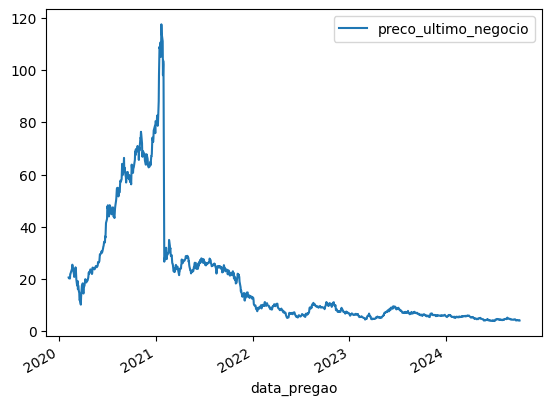

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

data = pd.read_csv('../dataset/dados_pregao_lwsa3.csv', header=0, parse_dates=True, index_col=0)
df = data[['preco_ultimo_negocio']]
print(df.head())
df.plot()
pyplot.show

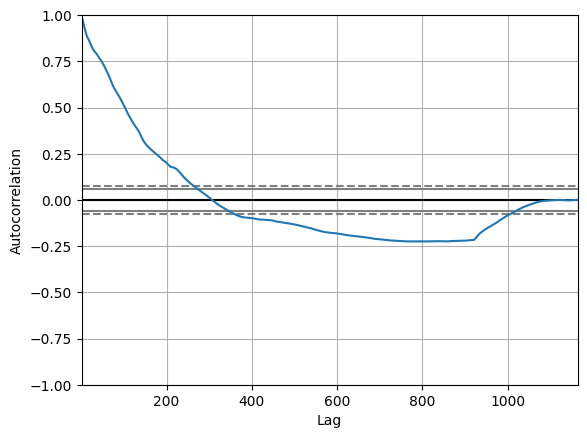

In [2]:
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df)
pyplot.show()

In [3]:
from pmdarima import auto_arima
import warnings

warnings.filterwarnings('ignore')

In [4]:
stepwise_fit = auto_arima(df['preco_ultimo_negocio'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5422.707, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5427.312, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5428.757, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5428.707, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5425.350, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5420.763, Time=0.52 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5428.514, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5418.979, Time=0.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5420.765, Time=0.56 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5428.962, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5417.016, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5426.743, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5426.793, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=5418.802, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0]          

predicted=6.055764, expected=6.720000
predicted=6.698904, expected=6.490000
predicted=6.499841, expected=6.820000
predicted=6.825243, expected=6.810000
predicted=6.804588, expected=6.610000
predicted=6.606298, expected=6.260000
predicted=6.248068, expected=6.160000
predicted=6.166911, expected=6.220000
predicted=6.216101, expected=6.290000
predicted=6.296786, expected=6.120000
predicted=6.106060, expected=6.230000
predicted=6.248072, expected=6.160000
predicted=6.139777, expected=6.090000
predicted=6.106079, expected=6.200000
predicted=6.189618, expected=5.770000
predicted=5.760850, expected=5.940000
predicted=5.956178, expected=6.050000
predicted=6.039523, expected=5.980000
predicted=5.986843, expected=6.090000
predicted=6.088372, expected=6.160000
predicted=6.164635, expected=6.000000
predicted=5.988543, expected=6.020000
predicted=6.031746, expected=5.980000
predicted=5.967102, expected=6.010000
predicted=6.023553, expected=5.980000
predicted=5.965822, expected=5.850000
predicted=5.

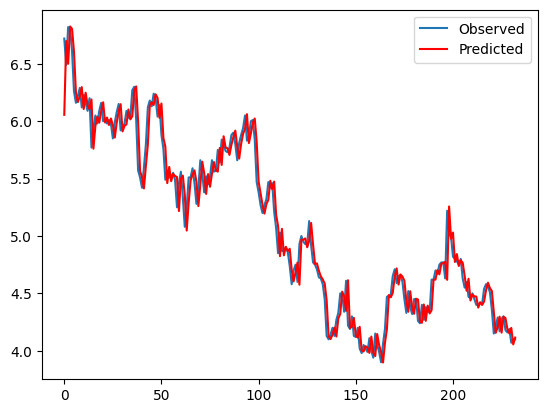

In [5]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

X = df.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit()

    output = model_fit.forecast()
    yhat = output[0]

    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

pyplot.plot(test, label='Observed')
pyplot.plot(predictions, color='red', label='Predicted')
pyplot.legend()
pyplot.show()

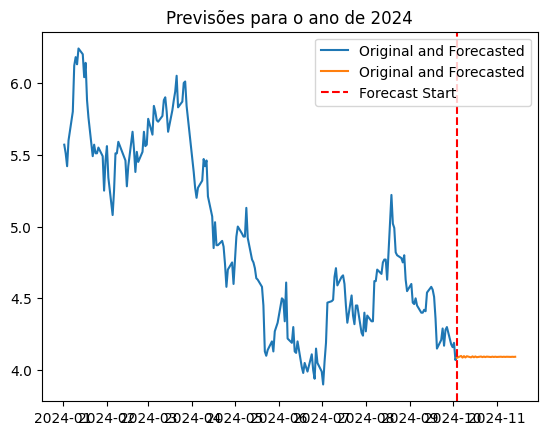

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Preparar o modelo ARIMA e fazer as previsões para os próximos 30 dias
X = df.values
history = [x for x in X]
model = ARIMA(history, order=(1,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)

# Gerar datas futuras
last_date = df.index[-1]
future_dates = pd.date_range(last_date, periods=30, freq='B')

# Adicionar previsões ao DataFrame
forecast_df = pd.DataFrame(forecast, index=future_dates, columns=['Forecast'])
df_with_forecast = pd.concat([df, forecast_df])

# Filtrar os dados apenas para o ano de 2024
df_2024 = df_with_forecast.loc['2024']

# Plotar os dados de 2024
plt.plot(df_2024, label='Original and Forecasted')
plt.axvline(x=last_date, color='red', linestyle='--', label='Forecast Start')
plt.legend()
plt.title('Previsões para o ano de 2024')
plt.show()